# Import the Dataset

For this data analysis, I'm using the connect-4 dataset from https://www.openml.org/search?type=data&sort=runs&id=40668&status=active or https://api.openml.org/d/40668.

Its ID is 40668.

In [1]:
import openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = openml.datasets.get_dataset(40668)
X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute)

# Inspect the Data

## Display the first few rows using .head() to get a quick overview.

In [2]:
X.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X.shape, y.shape

((67557, 42), (67557,))

Number of instances: 67557
Number of features: 42
Number of classes: 3
Number of numerical features: 0
Number of categorical features: 42

Class distribution:
class
2    44473
1    16635
0     6449
Name: count, dtype: int64


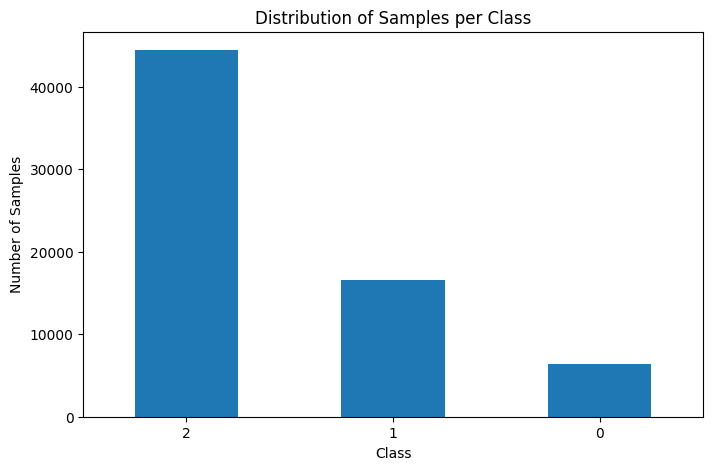

In [4]:
# Calculate basic dataset properties
num_instances = X.shape[0]
num_features = X.shape[1]
num_classes = y.nunique() if hasattr(y, 'nunique') else len(np.unique(y))

# Convert the categorical_indicator to a NumPy array for easier manipulation
categorical_array = np.array(categorical_indicator)
num_categorical_features = categorical_array.sum()  # True values indicate categorical features
num_numerical_features = len(categorical_array) - num_categorical_features

print("Number of instances:", num_instances)
print("Number of features:", num_features)
print("Number of classes:", num_classes)
print("Number of numerical features:", num_numerical_features)
print("Number of categorical features:", num_categorical_features)

# Get the distribution of samples per class
class_distribution = y.value_counts()
print("\nClass distribution:")
print(class_distribution)

# Plot the distribution of samples per class
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Samples per Class")
plt.xticks(rotation=0) 
plt.show()

As we can see, the dataset is not balanced since the number of samples in each class is not roughly the same.

## Use .info() and .describe() to understand data types and summary statistics.

In [5]:
print("Info: ")
print(X.info())

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67557 entries, 0 to 67556
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   a1      67557 non-null  category
 1   a2      67557 non-null  category
 2   a3      67557 non-null  category
 3   a4      67557 non-null  category
 4   a5      67557 non-null  category
 5   a6      67557 non-null  category
 6   b1      67557 non-null  category
 7   b2      67557 non-null  category
 8   b3      67557 non-null  category
 9   b4      67557 non-null  category
 10  b5      67557 non-null  category
 11  b6      67557 non-null  category
 12  c1      67557 non-null  category
 13  c2      67557 non-null  category
 14  c3      67557 non-null  category
 15  c4      67557 non-null  category
 16  c5      67557 non-null  category
 17  c6      67557 non-null  category
 18  d1      67557 non-null  category
 19  d2      67557 non-null  category
 20  d3      67557 non-null  category
 21  d4   

In [6]:
print("Feature Variables Summary:")
print(X.describe(include="all"))

print("\nTarget Variable Summary:")
print(y.describe())

Feature Variables Summary:
           a1     a2     a3     a4     a5     a6     b1     b2     b3     b4  \
count   67557  67557  67557  67557  67557  67557  67557  67557  67557  67557   
unique      3      3      3      3      3      3      3      3      3      3   
top         0      0      0      0      0      0      2      0      0      0   
freq    24982  43385  55333  61616  65265  67040  25889  41180  54352  61206   

        ...     f3     f4     f5     f6     g1     g2     g3     g4     g5  \
count   ...  67557  67557  67557  67557  67557  67557  67557  67557  67557   
unique  ...      3      3      3      3      3      3      3      3      3   
top     ...      0      0      0      0      0      0      0      0      0   
freq    ...  60374  64839  66819  67469  29729  48104  58869  64301  66710   

           g6  
count   67557  
unique      3  
top         0  
freq    67465  

[4 rows x 42 columns]

Target Variable Summary:
count     67557
unique        3
top           2
freq

## Check for missing values and duplicates

In [7]:
print("Missing values per feature:")
print(X.isnull().sum())

Missing values per feature:
a1    0
a2    0
a3    0
a4    0
a5    0
a6    0
b1    0
b2    0
b3    0
b4    0
b5    0
b6    0
c1    0
c2    0
c3    0
c4    0
c5    0
c6    0
d1    0
d2    0
d3    0
d4    0
d5    0
d6    0
e1    0
e2    0
e3    0
e4    0
e5    0
e6    0
f1    0
f2    0
f3    0
f4    0
f5    0
f6    0
g1    0
g2    0
g3    0
g4    0
g5    0
g6    0
dtype: int64


In [8]:
print("Number of duplicate rows in features:", X.duplicated().sum())

Number of duplicate rows in features: 0


# Basic Filtering and Grouping

## Apply filters to extract meaningful subsets of the data.

In [9]:
# Filtering: center taken by Player 1 (d3 == 1 and d4 == 1)

center_p1_mask = (X["d3"] == "1") & (X["d4"] == "1")
X_center_p1 = X[center_p1_mask]
y_center_p1 = y[center_p1_mask]

print(f"Rows where center is taken by Player 1 (d3=1 & d4=1): {X_center_p1.shape[0]} / {X.shape[0]}")
print(X_center_p1.head())

# For contrast, the complement set
X_not_center_p1 = X[~center_p1_mask]
y_not_center_p1 = y[~center_p1_mask]
print(f"Rows where center is NOT taken by Player 1: {X_not_center_p1.shape[0]} / {X.shape[0]}")

Rows where center is taken by Player 1 (d3=1 & d4=1): 749 / 67557
     a1 a2 a3 a4 a5 a6 b1 b2 b3 b4  ... f3 f4 f5 f6 g1 g2 g3 g4 g5 g6
1924  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1925  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1926  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1927  0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1928  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[5 rows x 42 columns]
Rows where center is NOT taken by Player 1: 66808 / 67557


## Use groupby() or equivalent on a selected variable and compute summary statistics (e.g., mean, count).

In [ ]:
# Grouping: Outcome distribution when center is taken by P1 vs not

def outcome_counts_and_props(series):
    counts = series.value_counts(dropna=False).rename("count")
    props = (counts / counts.sum()).rename("proportion")
    return pd.concat([counts, props], axis=1)

print("\n=== Outcome distribution | center taken by P1 (d3=1 & d4=1) ===")
dist_center_p1 = outcome_counts_and_props(y_center_p1)
print(dist_center_p1)

print("\n=== Outcome distribution | center NOT taken by P1 ===")
dist_not_center_p1 = outcome_counts_and_props(y_not_center_p1)
print(dist_not_center_p1)


=== Outcome distribution | center taken by P1 (d3=1 & d4=1) ===
       count  proportion
class                   
1        606    0.809079
2        142    0.189586
0          1    0.001335

=== Outcome distribution | center NOT taken by P1 ===
       count  proportion
class                   
2      44331    0.663558
1      16029    0.239926
0       6448    0.096515


# Explore a Machine Learning Algorithm
Choose an ML algorithm.
Begin experimenting with model inputs and outputs.

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into 80% training and 20% test sets.
# stratify=y is used to maintain the class distribution in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3959, stratify=y)

# Define percentages for subsampling (from 10% to 100% of the training set)
percentages = np.arange(0.1, 1.1, 0.1)

# List to collect results for each subset and each model
results = []

for p in percentages:
    subset_size = int(len(X_train) * p)
    # Randomly sample a subset of the training data. Using a fixed random_state for reproducibility.
    X_train_subset = X_train.sample(n=subset_size, random_state=3959)
    y_train_subset = y_train.loc[X_train_subset.index]
    
    # Train Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=3959)
    start_time = time.time()
    dt.fit(X_train_subset, y_train_subset)
    dt_train_time = time.time() - start_time
    dt_accuracy = accuracy_score(y_test, dt.predict(X_test))
    
    # Train Gradient Boosting Classifier
    gb = GradientBoostingClassifier(random_state=3959)
    start_time = time.time()
    gb.fit(X_train_subset, y_train_subset)
    gb_train_time = time.time() - start_time
    gb_accuracy = accuracy_score(y_test, gb.predict(X_test))
    
    results.append({
        "Subset Size (%)": int(p * 100),
        "Decision Tree Accuracy": dt_accuracy,
        "Decision Tree Training Time (s)": dt_train_time,
        "Gradient Boosting Accuracy": gb_accuracy,
        "Gradient Boosting Training Time (s)": gb_train_time
    })

In [12]:
# Create a DataFrame to display the results in a table
results_df = pd.DataFrame(results)
results_df

,Subset Size (%),Decision Tree Accuracy,Decision Tree Training Time (s),Gradient Boosting Accuracy,Gradient Boosting Training Time (s)
0,10,0.649349,0.081091,0.747114,4.174381
1,20,0.674216,0.159073,0.748002,3.891782
2,30,0.687167,0.145826,0.752812,5.477360
3,40,0.693458,0.194686,0.752442,7.345734
4,50,0.704411,0.243881,0.751332,9.303296
5,60,0.714772,0.350071,0.751702,11.982173
6,70,0.716992,0.339540,0.753256,13.626107
7,80,0.724023,0.402199,0.753478,14.470534
8,90,0.726317,0.434598,0.752886,15.914184
9,100,0.732460,0.483327,0.753922,17.513463


# Visualization
Create one plot (e.g., histogram, boxplot, scatter plot) using Matplotlib, Seaborn, or others. 

I've already created 2 plots above. I'll plot 3 more here.

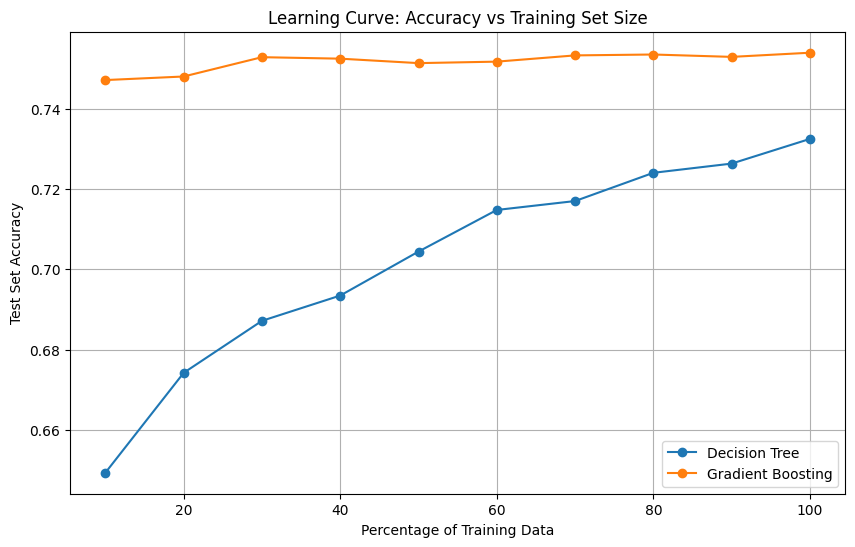

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(results_df["Subset Size (%)"], results_df["Decision Tree Accuracy"], marker='o', label="Decision Tree")
plt.plot(results_df["Subset Size (%)"], results_df["Gradient Boosting Accuracy"], marker='o', label="Gradient Boosting")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Test Set Accuracy")
plt.title("Learning Curve: Accuracy vs Training Set Size")
plt.legend()
plt.grid(True)
plt.show()

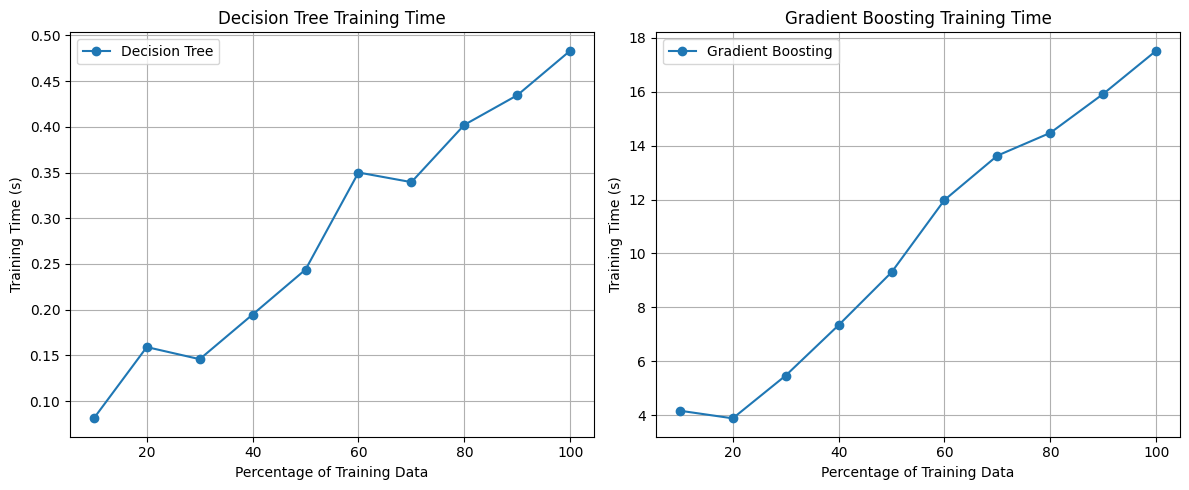

In [14]:
plt.figure(figsize=(12, 5))

# Plot for Decision Tree training time
plt.subplot(1, 2, 1)
plt.plot(results_df["Subset Size (%)"], results_df["Decision Tree Training Time (s)"], marker='o', label="Decision Tree")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Training Time (s)")
plt.title("Decision Tree Training Time")
plt.grid(True)
plt.legend()

# Plot for Gradient Boosting training time
plt.subplot(1, 2, 2)
plt.plot(results_df["Subset Size (%)"], results_df["Gradient Boosting Training Time (s)"], marker='o', label="Gradient Boosting")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Training Time (s)")
plt.title("Gradient Boosting Training Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Summary

When we look at the accuracy, as we increase the percentage of training data, gradient descent has approximately the same accuracy. Percentage of training data does not affect the accuracy of gradient descent. In contrast, as we increase the percentage of training data, the accuracy of decision tree increases approximately linearly with the percentage of training data. The accuracy of decision tree is positively related to the percentage of training data. 

On the other hand, gradient boosting always has a higher accuracy than decision tree, even though decision tree increases with the percentage of training data. Its lowest accuracy is higher than the highest accuracy of decision tree.

When we look at the training time, as we increase the percentage of training data, the training time of both decision tree and gradient boosting increases approximately linearly. 

On the other hand, gradient descent only increased from 0.05 seconds to 0.30 seconds, whereas gradient boosting increased from 2 seconds to 10 seconds. Even though they have remained the same increasing pattern, gradient boosting is much slower than gradient descent throughout the whole time. Decision tree has a shorter training time.